# Building a Model for Probability of Default
---

## Problem Statement
Bank A has past records of its Bank Loan Customers who have either Fully Paid Off or Defaulted on their Loans. The Bank wants build wants to build a model that will predict if a future Loan customer would Default.

## Approach
Since the Dependant Variable (Loan Status) is Binary,i.e., either Default or Non-Default, it is a clear case of Logistic Regression.
* Defaulter = 1
* Non-Defaulter = 0

## Steps
* Import Data and Libraries
* Data Description
* Data Cleaning and Encoding
    * Null Value Treatment
    * Rename Columns
    * Replace Values
    * Encode Category columns to Numeric
* Variable Selection
    * Data Visualization
    * Machine Learning Algorithm
* Split the Data into Training and Testing Data
* Build the Model
* Performance Measurement
* Actuals vs Predicted
* Convert to Flat File
---

## Import Libraries

In [50]:
import pandas as pd

## For Detecting Outliers (Z Score)
from scipy import stats
## Numeric Functions
import numpy as np
## For Plots
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [197]:
df = pd.read_csv("https://github.com/penroselearning/curriculum/raw/master/professional/bank_loan_data.csv")

## Data Structure and Exploration

In [198]:
df.shape

(24642, 19)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24642 entries, 0 to 24641
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       24642 non-null  object 
 1   Customer ID                   24642 non-null  object 
 2   Loan Status                   24642 non-null  object 
 3   Current Loan Amount           24642 non-null  int64  
 4   Term                          24642 non-null  object 
 5   Credit Score                  24592 non-null  float64
 6   Annual Income                 24642 non-null  int64  
 7   Years in current job          24553 non-null  object 
 8   Home Ownership                24642 non-null  object 
 9   Purpose                       24642 non-null  object 
 10  Monthly Debt                  24642 non-null  float64
 11  Years of Credit History       24642 non-null  float64
 12  Months since last delinquent  24642 non-null  int64  
 13  N

---
Display first 6 Rows and first 6 Columns

In [200]:
df.iloc[0:6,0:6]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score
0,98f1645b-5913-4711-80be-b23b5b67f0d5,137a0896-09bf-4aef-ae06-312e5d9392c7,Charged Off,257796,Short Term,370.0
1,afd17b85-ecf1-4f8f-80da-677d94c4fbb8,708a6d74-ec6f-4d38-bf7d-441d637adcf1,Fully Paid,224730,Short Term,696.0
2,df703d2e-dc45-4aaf-a838-52817d0095ff,bc141c8a-74a0-4e31-8dc8-88cc3e93633e,Charged Off,269324,Short Term,387.0
3,2fcbf874-9ed3-47a0-964b-74b0c5a75ad0,f318b22d-87df-40ba-aa2c-1eb2d7078e98,Fully Paid,421432,Short Term,697.0
4,a0c67880-b55a-44a0-842c-c2a7ba974c3b,0d365a60-03dc-4faa-b9be-b6161a2f6cee,Fully Paid,331628,Short Term,692.0
5,6c13c8f5-9728-4f3c-bd7c-7b5462c18be0,01a1dd71-23b2-42c2-b63a-b1584b2f0074,Fully Paid,357742,Long Term,655.0


In [201]:
df["Years in current job"].unique()

array(['< 1 year', '1 year', '10+ years', nan, '2 years', '3 years',
       '4 years', '5 years', '7 years', '8 years', '9 years', '6 years'],
      dtype=object)

In [202]:
df["Home Ownership"].unique()

array(['Rent', 'Home Mortgage', 'Own Home', 'HaveMortgage'], dtype=object)

In [203]:
df["Purpose"].unique()

array(['Debt Consolidation', 'Other', 'Home Improvements',
       'Medical Bills', 'Business Loan', 'moving', 'Buy a Car',
       'Buy House', 'vacation', 'Educational Expenses', 'wedding',
       'renewable_energy'], dtype=object)

In [204]:
df["Years in current job"].value_counts()

10+ years    8798
2 years      2201
3 years      2022
< 1 year     1860
5 years      1705
1 year       1558
4 years      1519
6 years      1421
7 years      1397
8 years      1136
9 years       936
Name: Years in current job, dtype: int64

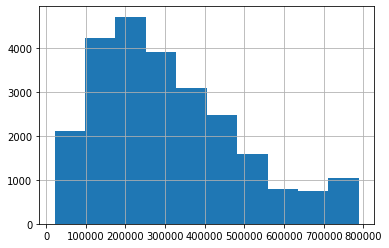

In [205]:
df["Current Loan Amount"].hist()

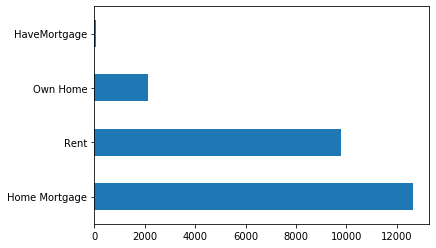

In [206]:
df["Home Ownership"].value_counts().plot(kind="barh")

## Data Cleaning

### Locate Null Values

In [207]:
df.isnull().sum()

Loan ID                          0
Customer ID                      0
Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                    50
Annual Income                    0
Years in current job            89
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Months since last delinquent     0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              1
Bankruptcies                    35
Tax Liens                        9
dtype: int64

### Replace Null Values

In [208]:
df["Years in current job"].fillna(df["Years in current job"].mode()[0],inplace=True)

In [209]:
cols = ["Credit Score","Maximum Open Credit","Bankruptcies","Tax Liens"]

for col in cols:
    df[col].fillna(df[col].median(),inplace = True)

### Replace Values

In [210]:
df["Home Ownership"].replace("HaveMortgage","Home Mortgage",inplace=True)

---
## Data Encoding

Replace Text Columns to Numeric

In [211]:
df["Loan Status"].unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

In [212]:
df["Defaulter"] = df["Loan Status"].apply(lambda x : 1 if x=="Charged Off" else 0)

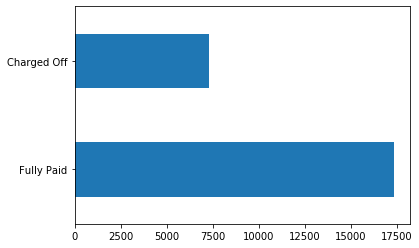

In [213]:
df["Loan Status"].value_counts().plot(kind="barh")

In [214]:
import re
def extract_number(years):
    search_term = '[0-9]'
    years_in_current_job = re.findall(search_term,years)
    return int("".join(years_in_current_job))

In [215]:
df['Years in current job'] = df['Years in current job'].apply(lambda x : extract_number(x))

In [216]:
df['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

### One Hot Encoding

In [217]:
df= pd.get_dummies(df,columns=['Term', 'Home Ownership',
       'Purpose'])

### Drop Column

In [218]:
df.drop(['Loan ID', 'Customer ID','Loan Status'],axis=1,inplace=True)

### Detecting and Removing Outliers

In [219]:
cols = list(df.select_dtypes(include=['int64','float64']))

df_zscore = np.abs(df[cols].apply(stats.zscore))
outliers = list(df_zscore[df_zscore > 3].dropna(thresh=1).index)

df.drop(df.index[outliers],inplace=True)

In [220]:
df.shape

(22404, 31)

In [221]:
df[["Defaulter","Credit Score"]].corr()

,Defaulter,Credit Score
Defaulter,1.000000,-0.937053
Credit Score,-0.937053,1.000000


### Data Visualization

In [222]:
def visualize(col):
    plt.figure(figsize=(16,4))
    
    plt.suptitle(col)
    
    plt.subplot(1,2,1)
    plt.title("Histogram")
    df[col].hist()

    plt.subplot(1,2,2)
    plt.title("Box Plot")
    sns.boxplot(x = df["Defaulter"],y = df[col])

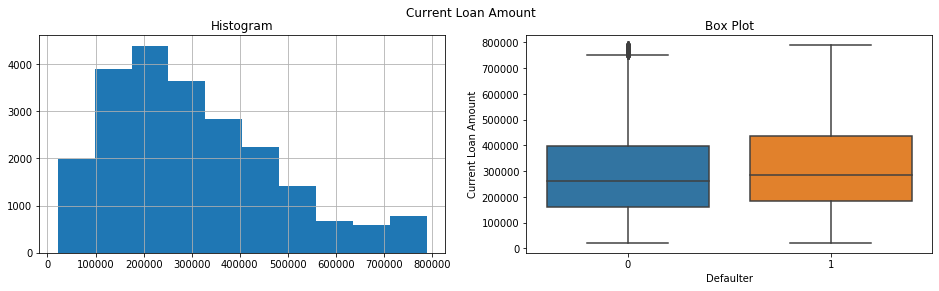

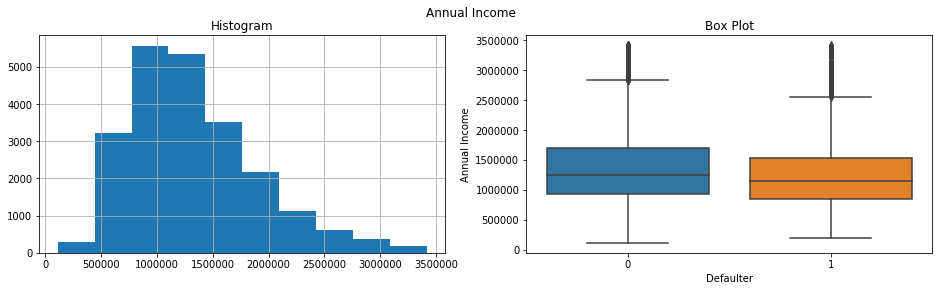

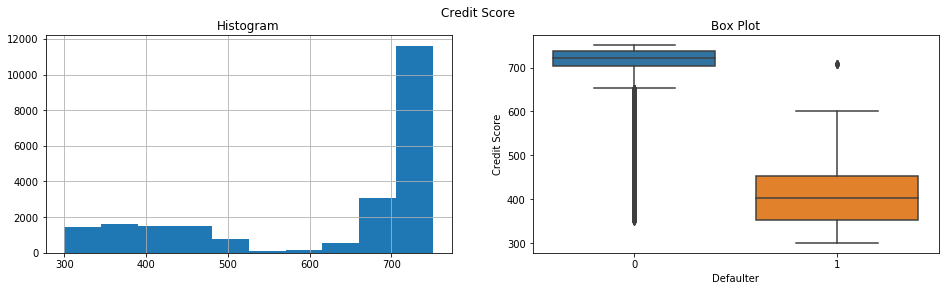

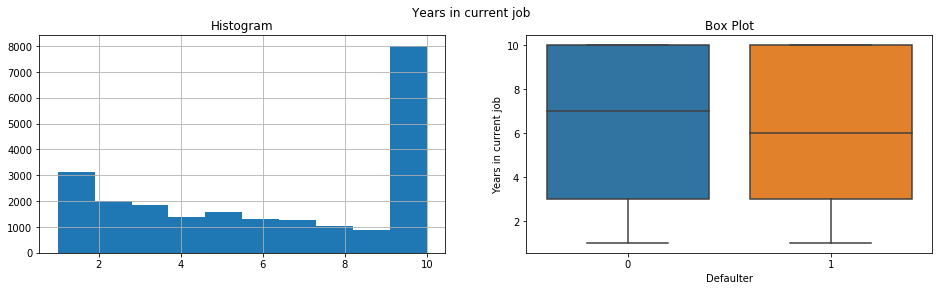

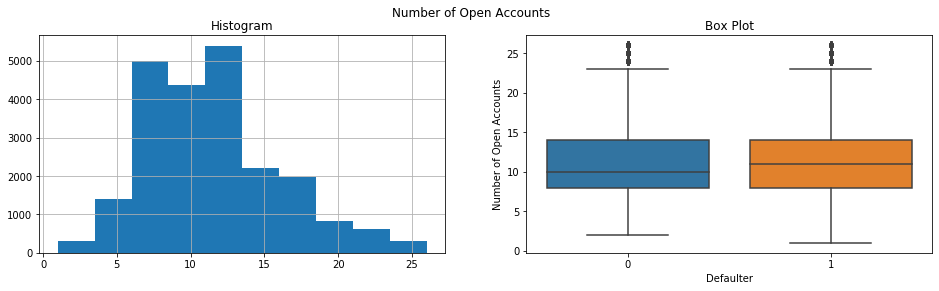

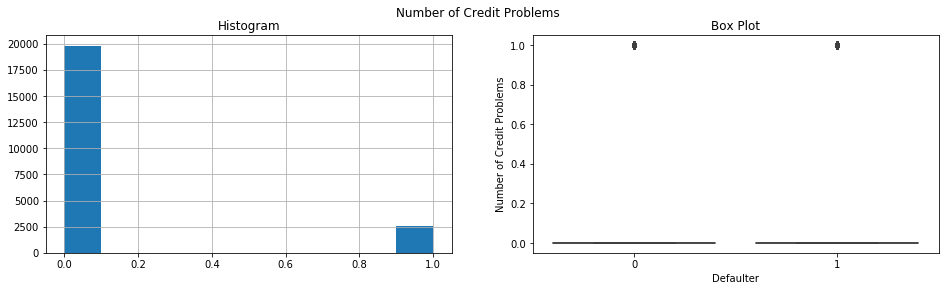

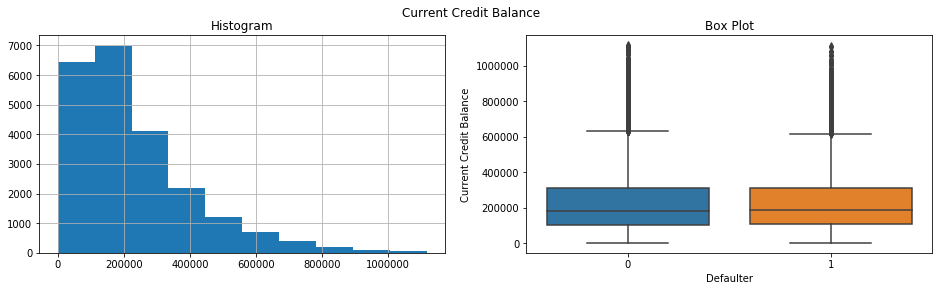

In [223]:
cols_for_visualization = ['Current Loan Amount','Annual Income','Credit Score','Years in current job',
                          'Number of Open Accounts','Number of Credit Problems','Current Credit Balance']

for col in cols_for_visualization:
    visualize(col)

---
## Variable Selection

In [224]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

cols = list(df.select_dtypes(include=['uint8','int64','float64']).columns)

X = df[[col for col in cols if col !='Defaulter']]
y = df[['Defaulter']]

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 5)
fit = rfe.fit(X, y)

In [225]:
list(zip(X.columns,fit.support_,fit.ranking_))

[('Current Loan Amount', False, 10),
 ('Credit Score', False, 4),
 ('Annual Income', False, 11),
 ('Years in current job', False, 7),
 ('Monthly Debt', False, 9),
 ('Years of Credit History', False, 6),
 ('Months since last delinquent', False, 8),
 ('Number of Open Accounts', False, 2),
 ('Number of Credit Problems', True, 1),
 ('Current Credit Balance', False, 12),
 ('Maximum Open Credit', False, 23),
 ('Bankruptcies', False, 5),
 ('Tax Liens', False, 26),
 ('Term_Long Term', True, 1),
 ('Term_Short Term', True, 1),
 ('Home Ownership_Home Mortgage', True, 1),
 ('Home Ownership_Own Home', False, 13),
 ('Home Ownership_Rent', False, 15),
 ('Purpose_Business Loan', True, 1),
 ('Purpose_Buy House', False, 20),
 ('Purpose_Buy a Car', False, 14),
 ('Purpose_Debt Consolidation', False, 3),
 ('Purpose_Educational Expenses', False, 24),
 ('Purpose_Home Improvements', False, 18),
 ('Purpose_Medical Bills', False, 17),
 ('Purpose_Other', False, 16),
 ('Purpose_moving', False, 19),
 ('Purpose_ren

#### Selected variables with Ranking of 1

In [226]:
selected_cols = list(X.columns[rfe.support_])

In [227]:
selected_cols

['Number of Credit Problems',
 'Term_Long Term',
 'Term_Short Term',
 'Home Ownership_Home Mortgage',
 'Purpose_Business Loan']

In [228]:
selected_cols.append("Credit Score")

#### Correlation of selected columns with Dependent Variable

In [229]:
corr = df.corr().abs()
corr = corr["Defaulter"]
corr.loc[selected_cols]

Number of Credit Problems       0.003318
Term_Long Term                  0.140521
Term_Short Term                 0.140521
Home Ownership_Home Mortgage    0.064485
Purpose_Business Loan           0.033679
Credit Score                    0.937053
Name: Defaulter, dtype: float64

---
## Splitting the Data - Training and Testing Data Set

In [230]:
df_final = df.copy()

In [231]:
#X - independent variables
#y - dependent variable

X = df_final[selected_cols]
y = df_final['Defaulter']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X), y,test_size=0.3,random_state=100)

---
## Build the Model

In [232]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Check the Model Accuracy

In [233]:
model.score(X_test,y_test)

0.9815531091936923

### Create an Array containing the predictions

In [234]:
y_predict = model.predict(X_test)
y_predict

array([0, 1, 1, ..., 0, 0, 0])

---
## Performance Measurement

In [235]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[4639  101]
 [  23 1959]]


* Top Left - True Negative
* Top Right - False Positive
* Bottom Left - False Negative
* Bottom Right - True Positive

In [236]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4740
           1       0.95      0.99      0.97      1982

    accuracy                           0.98      6722
   macro avg       0.97      0.98      0.98      6722
weighted avg       0.98      0.98      0.98      6722



## New Data Frame with Predicted Data

In [237]:
pred = y_test.copy()
pred = pred.to_frame()

pred.insert(1,"Prediction",y_predict)
pred.rename(columns={"Defaulter":"Actual"},inplace=True)

In [238]:
fn = list(pred[(pred["Actual"]==1) & (pred["Prediction"]==0)].index)
fp = list(pred[(pred["Actual"]==0) & (pred["Prediction"]==1)].index)

df[df.index.isin(fp)].to_csv("_fp.csv")
df[df.index.isin(fn)].to_csv("_fn.csv")

---
## Converting to Flat File
The flat file can be plugged into an application for Prediction on Live Data

In [240]:
import pickle

# wb - refers to writing as binary
with open("algorithm.pkl","wb") as file:
    pickle.dump(model,file)